# **Paso 1: Entender el enunciado del problema y el caso práctico**

* El Marketing es fundamental para el crecimiento y la sostenibilidad de cualquier negocio.

* Los especialistas en Marketing tienen como función desarrollar la marca, atraer clientes, aumentar ingresos y ventas.

* Uno de los puntos críticos para los especialistas en Marketing es conocer e identificar las necesidades de los clientes.

* Al contar con información precisa sobre los clientes, el departamento de Marketing puede dirigir campañas de Marketing especializadas que se adapte a las necesidades del cliente.

* Si se cuenta con los datos de los clientes, la ciencia de datos ayuda a realizar la segmentación de clientes.



**Caso práctico Departamento de Marketing**

En este caso trabajas como consultor en un banco de la ciudad de New York. El banco cuenta con datos de sus clientes de los últimos 6 meses. El equipo de Marketing de la empresa desea hacer una campaña de Marketing publicitaria dirigida dividiendo a sus clientes en al menos 3 grupos distintos.

En este caso tenemos: 


**Variables Input:**



* **CUSTID:** Identificador del titular de la tarjeta de crédito
* **Balance:** Cantidad de saldo que queda en la cuenta para hacer compras
* **Balance_Frequency:** Frecuencia de la utilización del saldo, puntuación entre 0 y 1:
    * 1: Actualizado con frecuencia
    * 0: No actualizado con frecuencia 
* **Purchases:** Cantidad de compras realizadas desde la cuenta
* **OneOffPurchases:** Importe máximo de compra realizado a una sola cuota
* **Installments_purchases:** Importe de la compra realizada a cuotas.
* **Cash_Advance:** Anticipo dado al cliente en efectivo (avance).
* **Purchases_Frequency:** Frecuencia con la que se realizan las compras, puntuación entre 0 y 1. 
    * 1: Compra con frecuencia
    * 0: No compra con frecuencia
* **OneOff_Purchases_frequency:** Con qué frecuencia las compras se realizan a una sola cuota.
     * 1: Compra con frecuencia
     * 0: No compra con frecuencia
* **Purchase_Installments_Frequency:** Con qué frecuencia se realizan las compras a plazos o cuotas.
     * 1: Se realizan con frecuencia
     * 0: No se realizan con frecuencia 
* **Cash_Advance_Frequency:** Con qué frecuencia se solicita un avance

* **Cash_Advance_TRX:** Número de transacciones realizadas de avances

* **Purchases_TRX:** Número de transacciones de compras realizadas

* **Credit_limit:** Límite de la tarjeta de crédito

* **Payments:** Número de pagos realizados por el cliente

* **Minimum_Payments:** Cantidad mínima de pagos realizados por el cliente

* **PRC_Full_Payment:** Porcentaje del pago total pagado por el cliente

* **Tenure:** Permanencia del servicio de tarjeta de crédito (antiguedad).

Fuente: https://www.kaggle.com/arjunbhasin2013/ccdata







# **Paso 2: Importar las librerias y el dataset** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
#Analisis de componentes principales
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Cargar el csv
creditcard_df = pd.read_csv("/content/sample_data/bank (4).csv")

In [ ]:
creditcard_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

# El balance promedio es $1564 - saldo en tarjetas de crédito
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9 significa que se usa mucho la tarjeta de credito
# El promedio de las compras es $1000 dolares
# El importe máximo de compra a una sola cuota es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el banco 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Vamos a investigar quien ha hecho una compra de $40761
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [ ]:
#quien solicito un avance de $47137?
# Este cliente hizo un total de 123 transacciones de avances
creditcard_df[creditcard_df['CASH_ADVANCE'] > 30000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# **Paso 3: Visualizar el conjunto de datos**

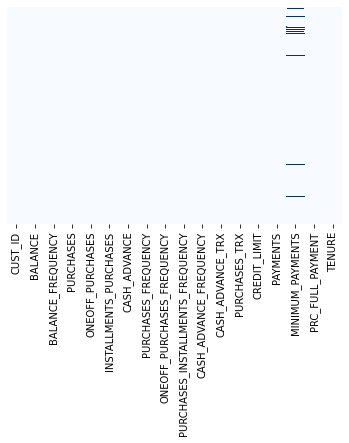

In [ ]:
# Comprobemos a ver si tenemos datos faltantes
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
creditcard_df.duplicated().sum()

0

In [ ]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#Número de variables en el modelo
n = len(creditcard_df.columns)
n

17

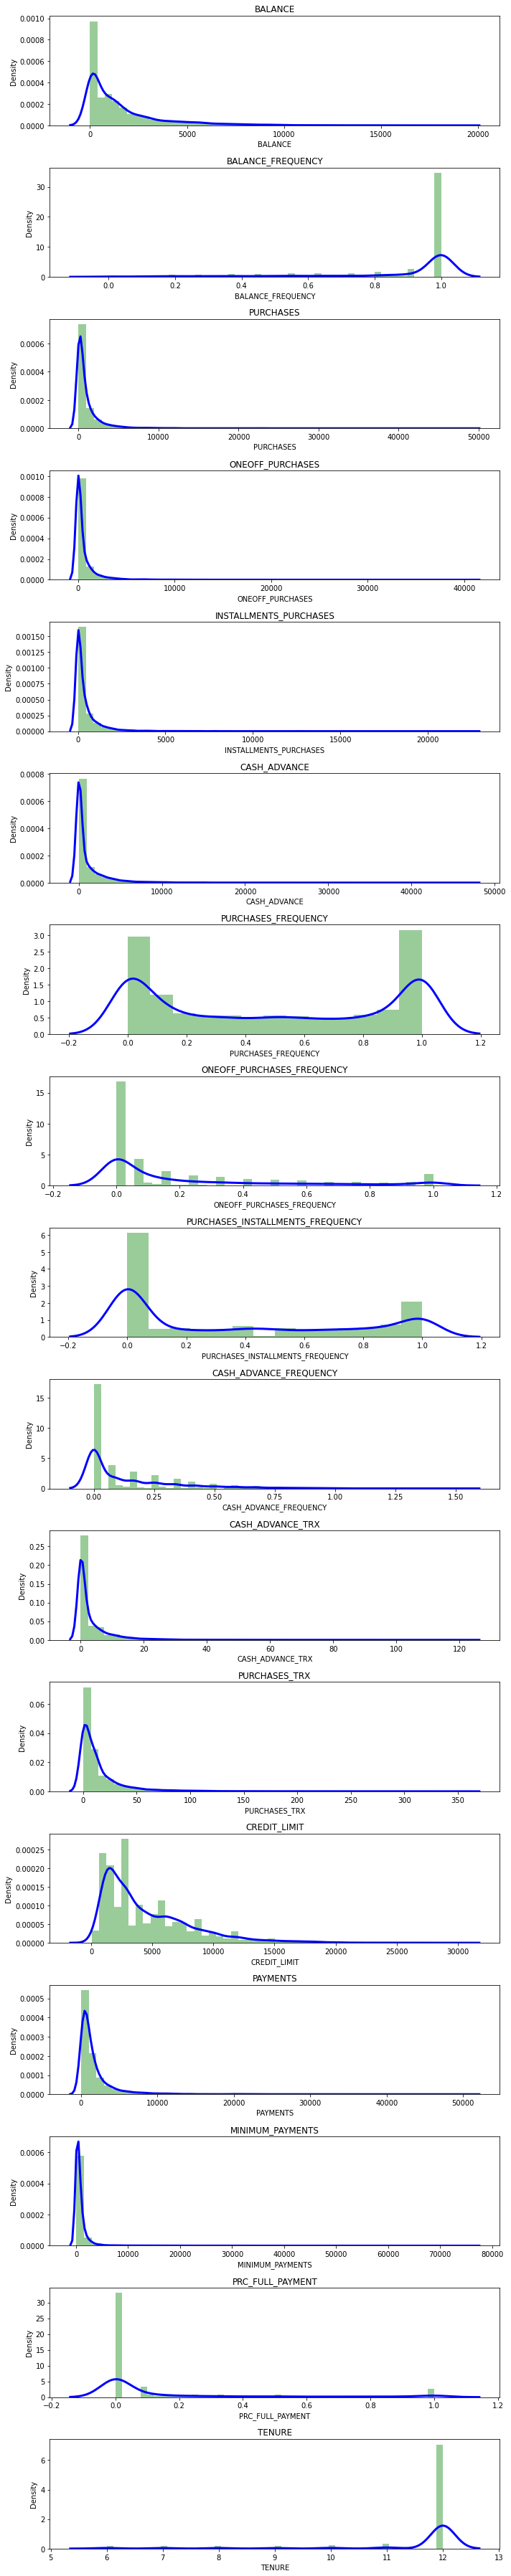

In [ ]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

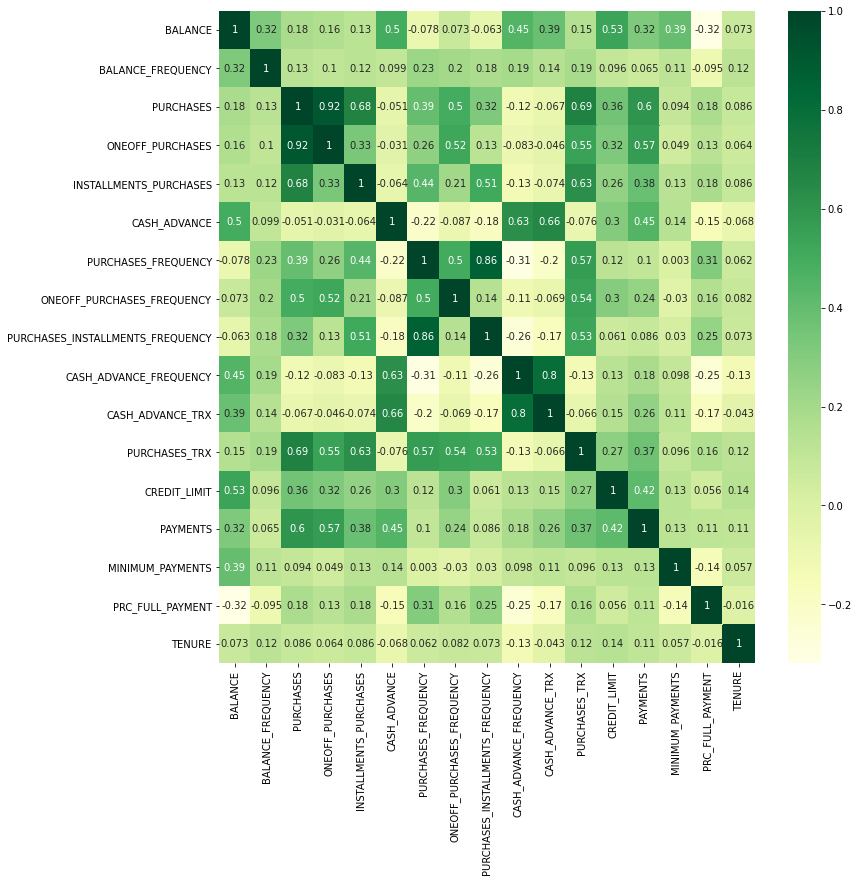

In [ ]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correlations, annot=True, cmap="YlGn")
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


# **Paso 4: Encontrar el número óptimo de clusters con el método del codo**

- El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de clustering diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

## **Estandarización del dataset**

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

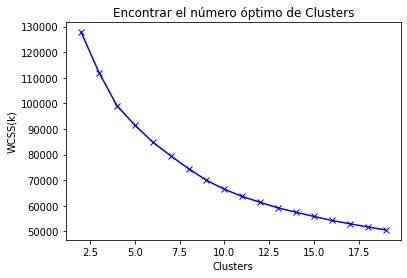

In [ ]:
# Método del codo para identificar el número óptimo de clusters
# ==============================================================================
scores_1 = []

range_values = range(2, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i,
                    n_init       = 20, 
                    random_state = 123)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
# Elijamos pues un número de clusters igual a 8.

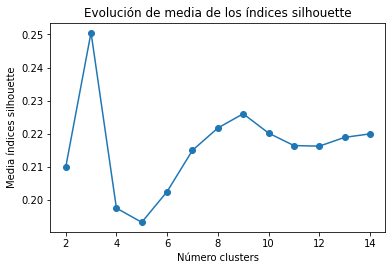

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
from sklearn.metrics import silhouette_score

range_values = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_values:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(creditcard_df_scaled)
    silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_values, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

# **Paso 5: Aplicar el método K-Means**

In [ ]:
num_clusters=8
kmeans = KMeans(n_clusters= num_clusters, n_init= 40, random_state = 123)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([2, 3, 5, ..., 7, 7, 7], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364975,0.332748,-0.033638,-0.242375,0.365557,-0.362180,0.996371,-0.383266,1.208526,-0.472443,-0.359615,0.190680,-0.261410,-0.214638,-0.051113,0.320321,0.255686
1,-0.700882,-2.141259,-0.310150,-0.234650,-0.302135,-0.320253,-0.554333,-0.441826,-0.439618,-0.521281,-0.376272,-0.419128,-0.173139,-0.191321,-0.256691,0.286741,0.202634
2,0.007517,0.403752,-0.356044,-0.240994,-0.399002,-0.102489,-0.847456,-0.391378,-0.751266,0.088978,-0.038542,-0.480047,-0.307479,-0.253246,-0.007962,-0.456181,0.274208
3,1.662821,0.395588,-0.225622,-0.161140,-0.237502,1.992649,-0.487861,-0.214215,-0.427212,1.920673,1.918344,-0.275264,1.008424,0.790512,0.503063,-0.395297,0.072759
4,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
5,-0.131329,0.399604,0.542893,0.672187,0.048554,-0.329574,0.983131,1.904000,0.177588,-0.413291,-0.330843,0.620249,0.441015,0.150408,-0.158002,0.447508,0.268526
6,1.056501,0.467735,2.450714,1.791735,2.503015,-0.155439,1.167125,1.544989,1.275155,-0.279918,-0.145446,3.105339,1.276609,1.423437,0.737772,0.234593,0.337784
7,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775


In [ ]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (Revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,804.810319,0.956096,931.336064,190.144574,741.636572,219.362297,0.890243,0.088122,0.844737,0.040604,0.794718,19.449427,3543.333434,1111.787957,745.088854,0.247403,11.859492
1,105.647726,0.370026,340.565474,202.965761,137.850812,307.286565,0.267870,0.070652,0.189722,0.030830,0.681049,4.291878,3864.500376,1179.288237,265.999116,0.237582,11.788494
2,1580.121325,0.972916,242.511838,192.436743,50.255182,763.946187,0.150225,0.085702,0.065865,0.152950,2.985808,2.777656,3375.715672,1000.022241,845.652149,0.020289,11.884279
3,5025.496408,0.970982,521.160011,324.977345,196.297548,5157.549613,0.294548,0.138553,0.194653,0.519491,16.340113,7.867797,8163.507961,4021.597813,2036.573267,0.038097,11.614689
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,1291.124584,0.971933,2163.104584,1708.130161,454.974424,287.738422,0.884928,0.770458,0.435015,0.052440,0.991063,30.126899,6099.041352,2168.559384,495.988440,0.284603,11.876676
6,3763.492132,0.988073,6239.192674,3566.350947,2674.513036,652.909310,0.958774,0.663358,0.871216,0.079130,2.256267,91.896936,9139.275766,5853.855859,2583.551923,0.222329,11.969359
7,868.050123,0.794235,386.843712,236.159280,151.164432,1120.136414,0.408083,0.116786,0.274475,0.196877,3.251200,5.060800,2448.023119,595.290996,377.716763,0.157375,7.235200


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.min()

0

In [ ]:
labels.max()

7

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 3, 5, ..., 7, 7, 7], dtype=int32)

In [ ]:
# Concatenamos las etiquetas de los clusters con el dataset riginal 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head(9)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,6
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,2


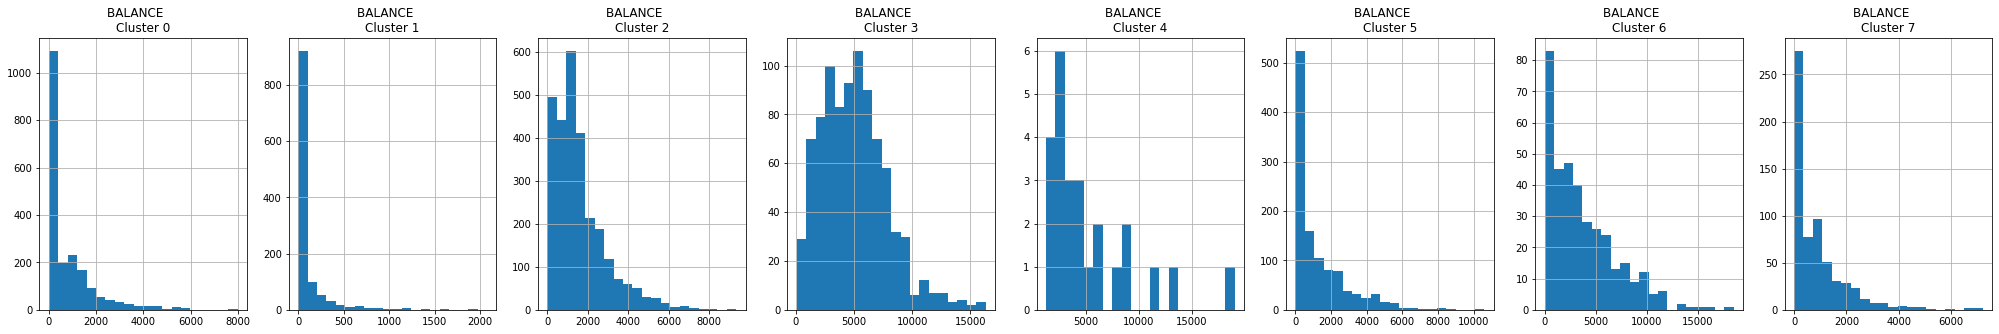

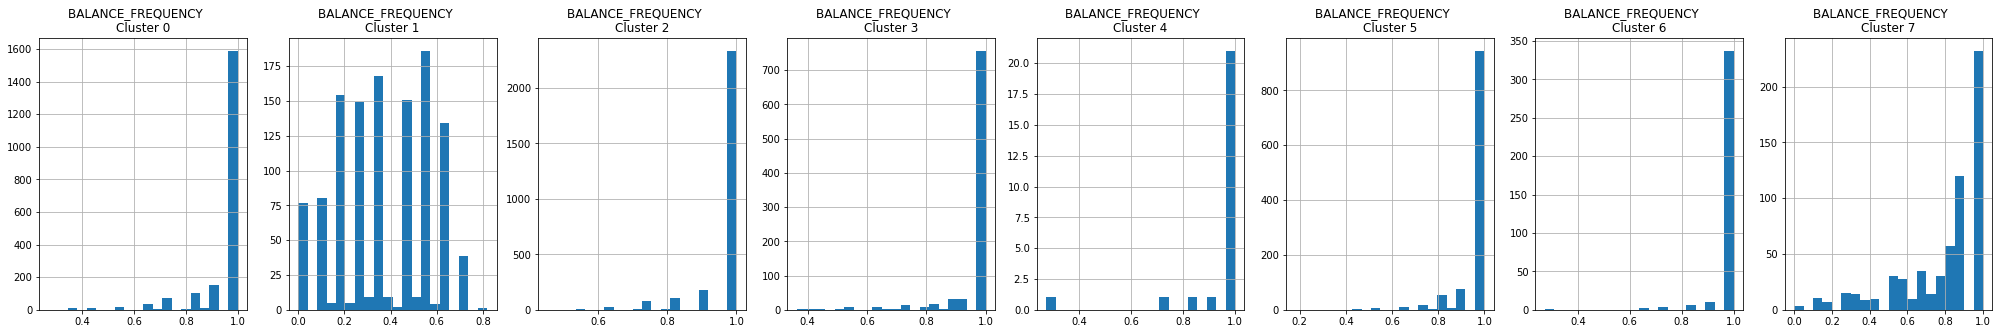

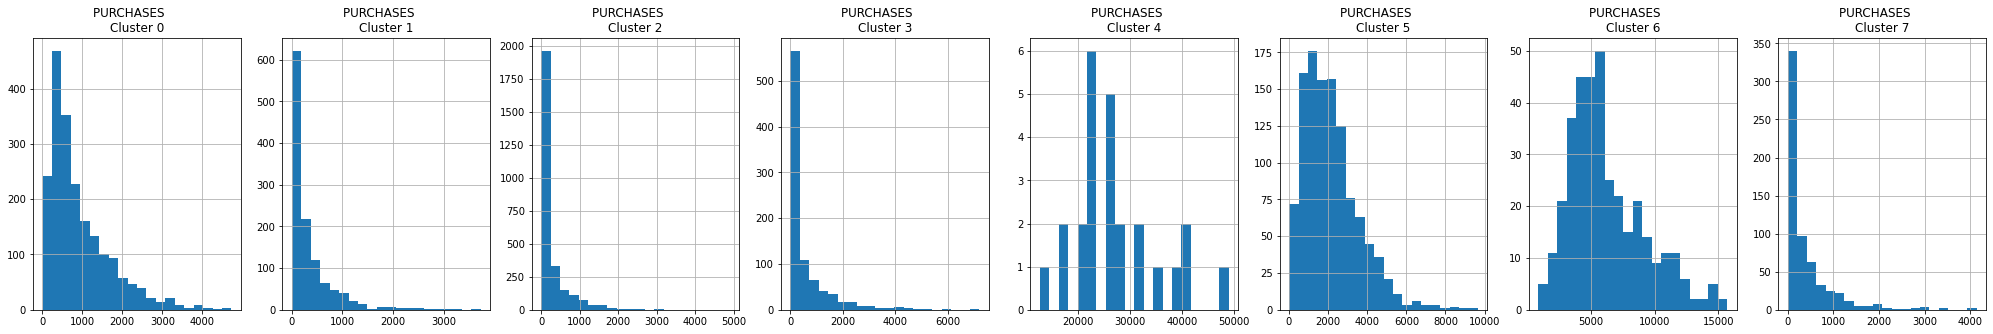

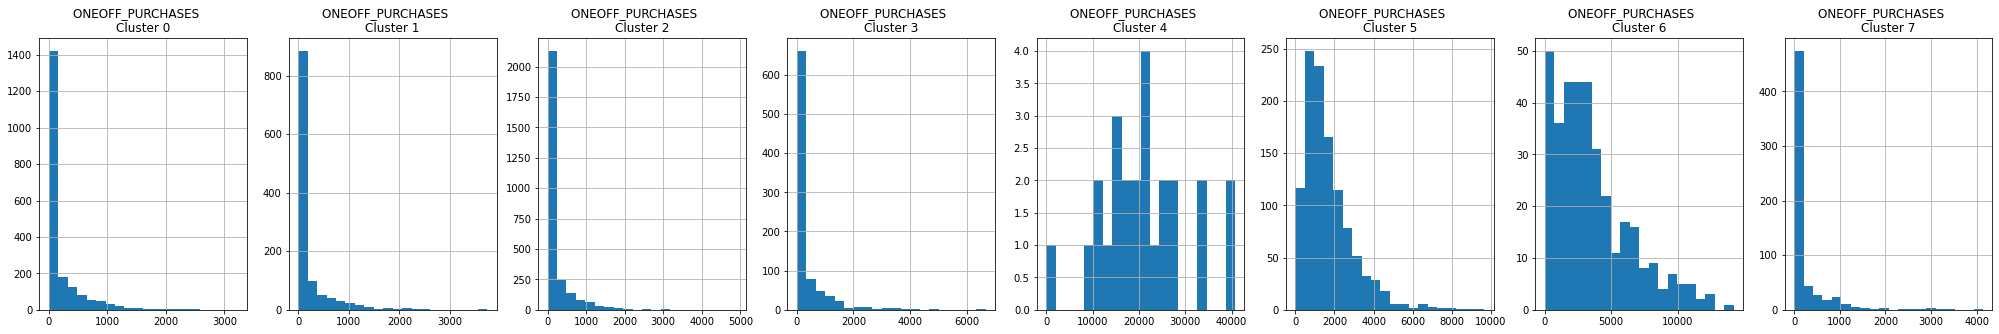

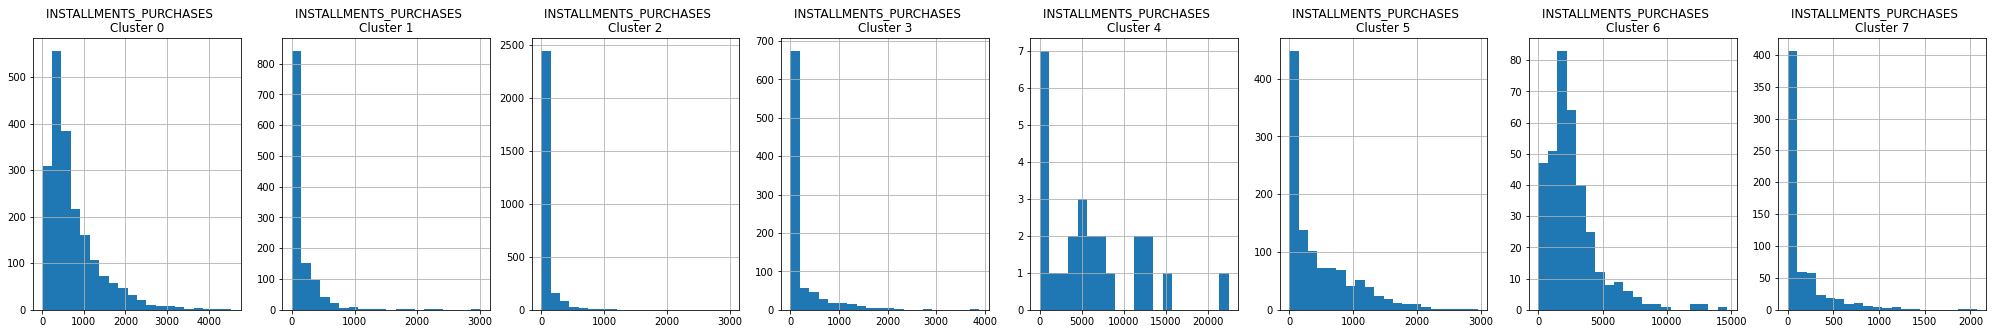

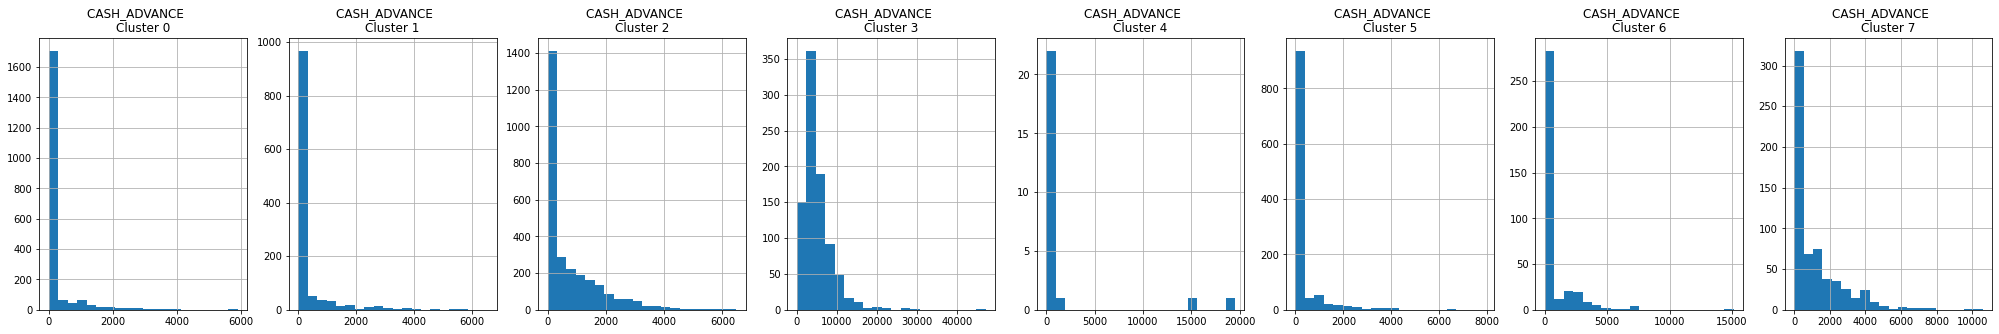

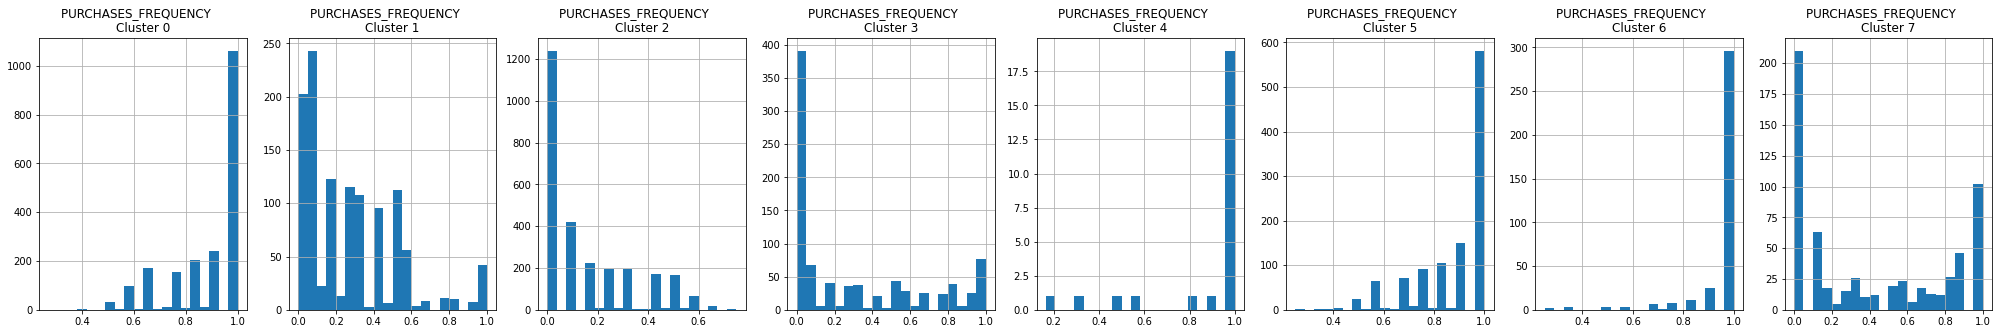

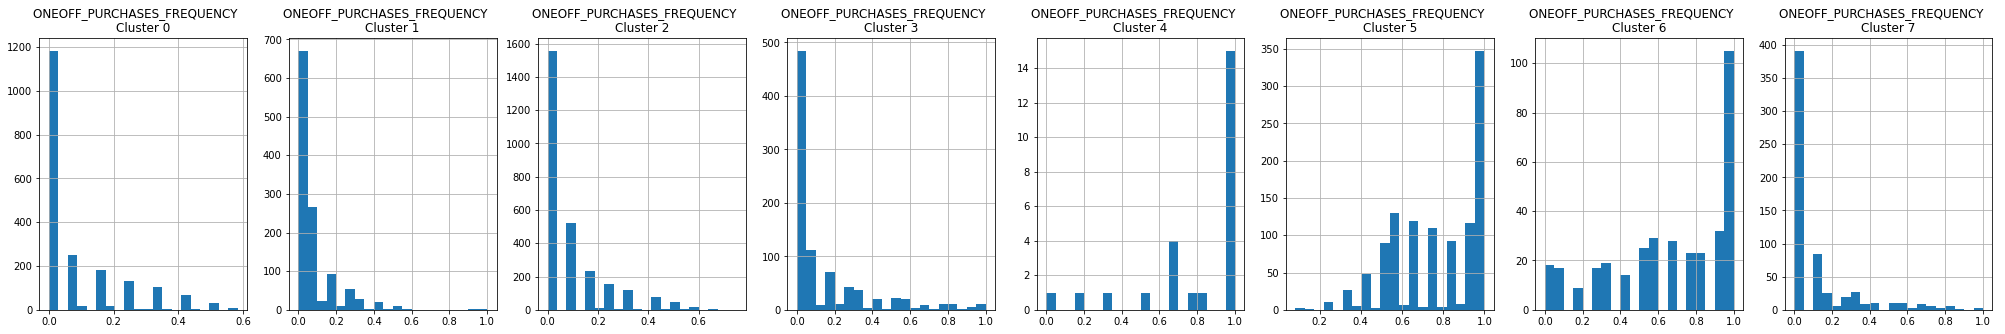

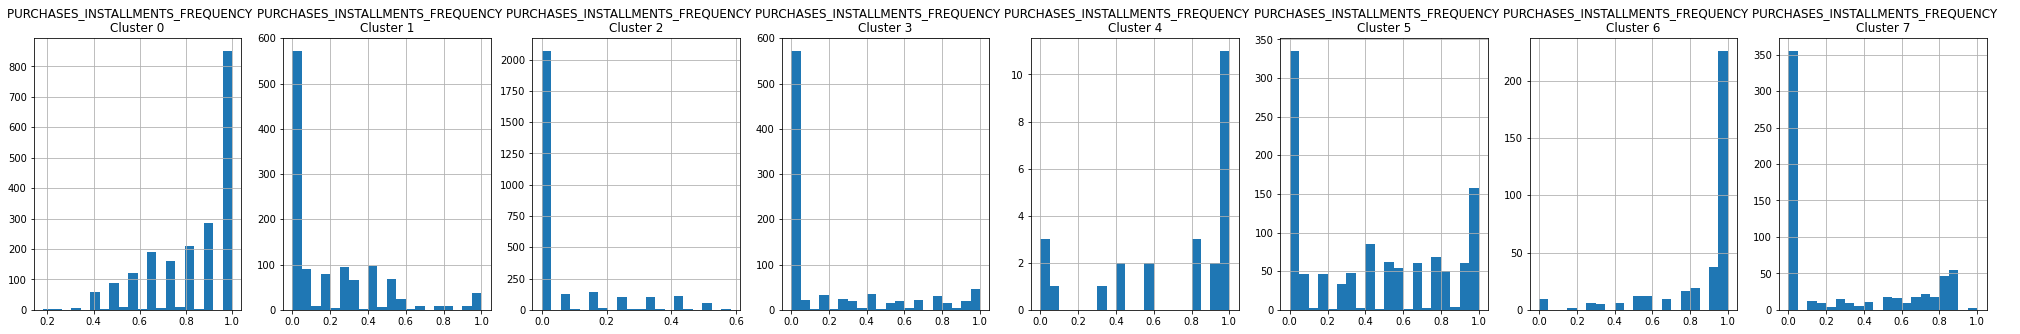

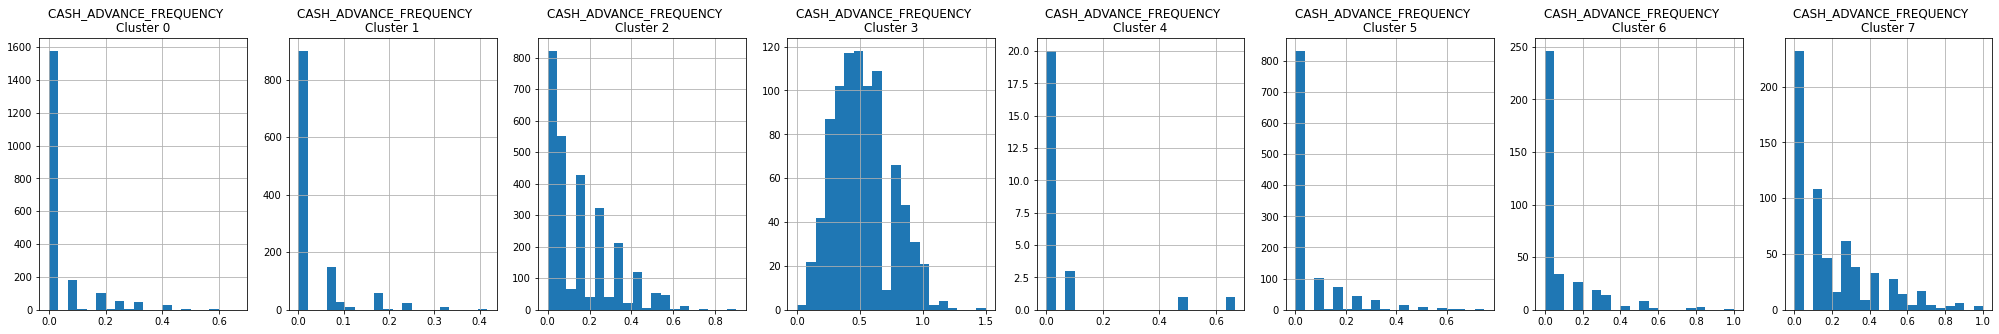

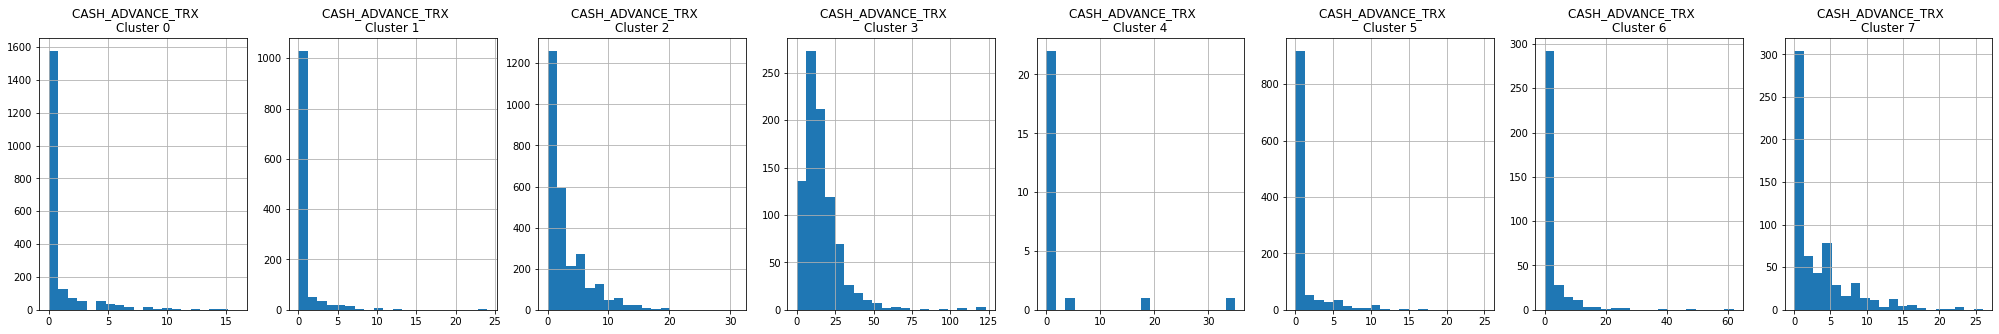

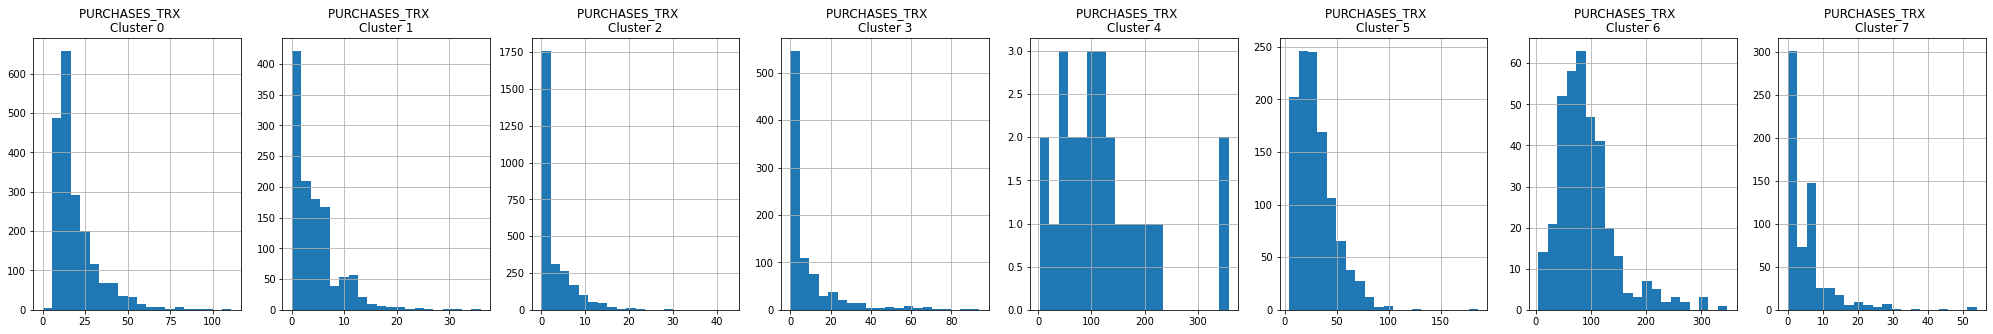

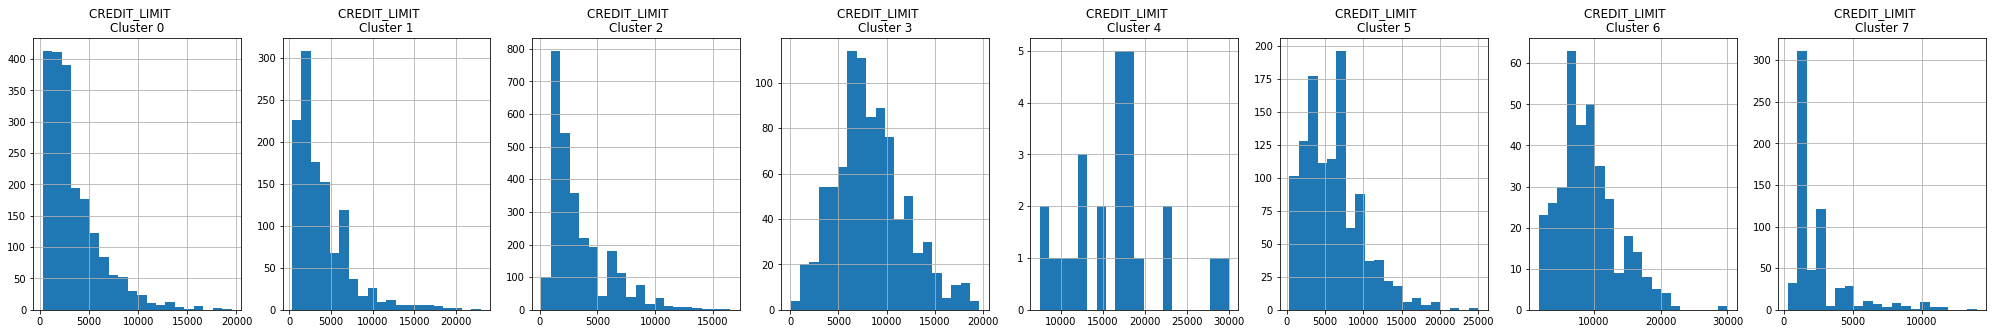

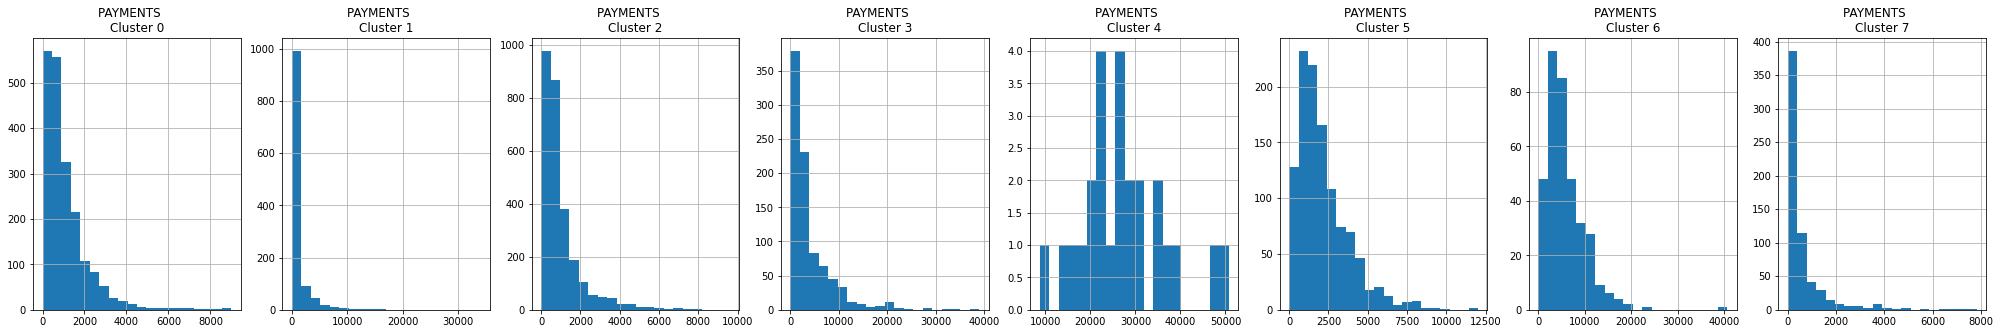

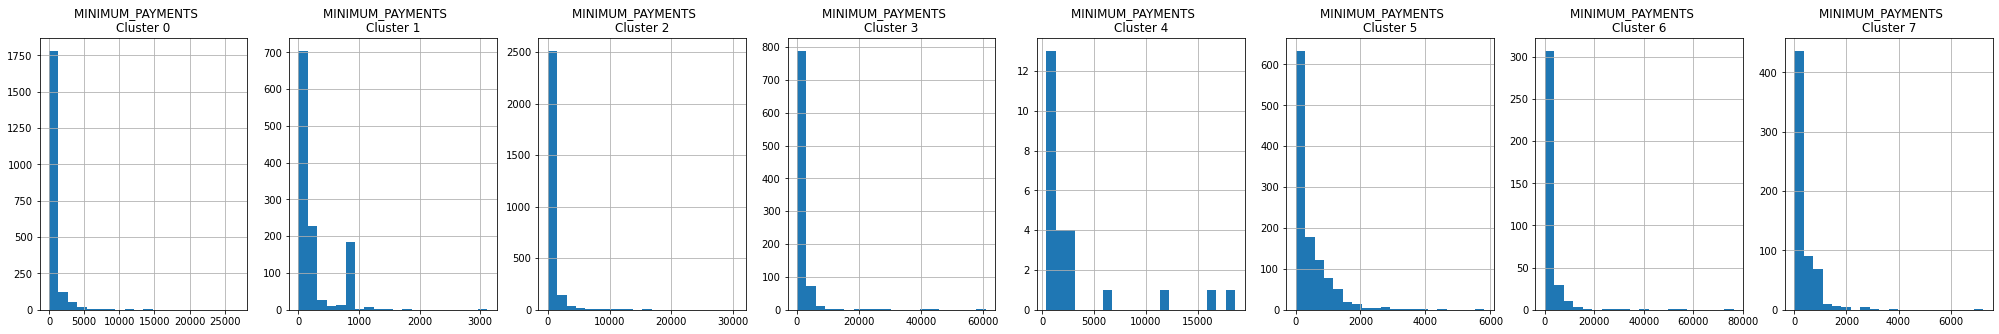

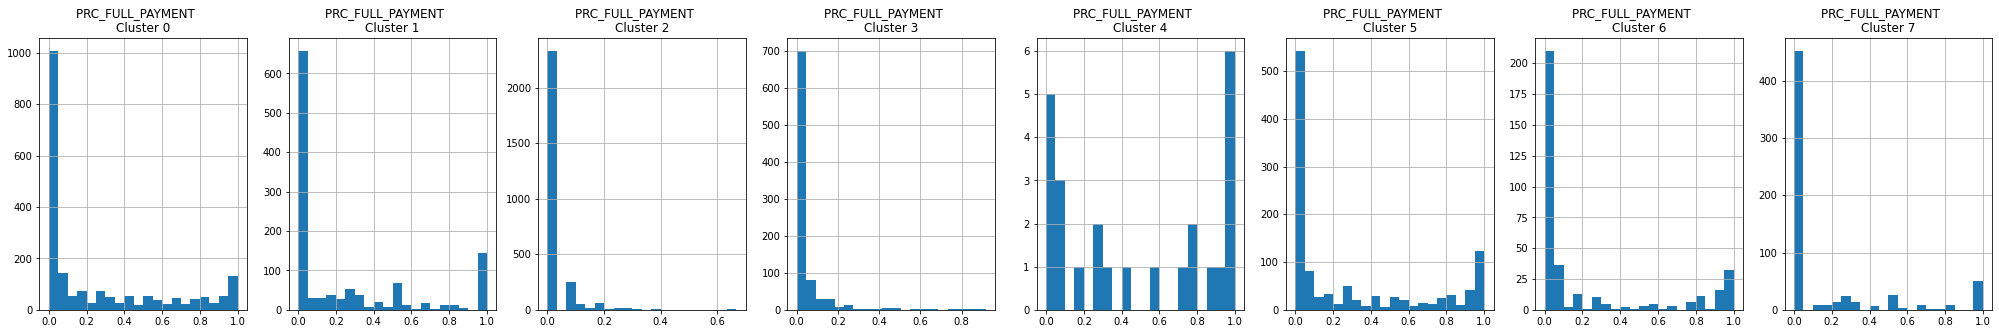

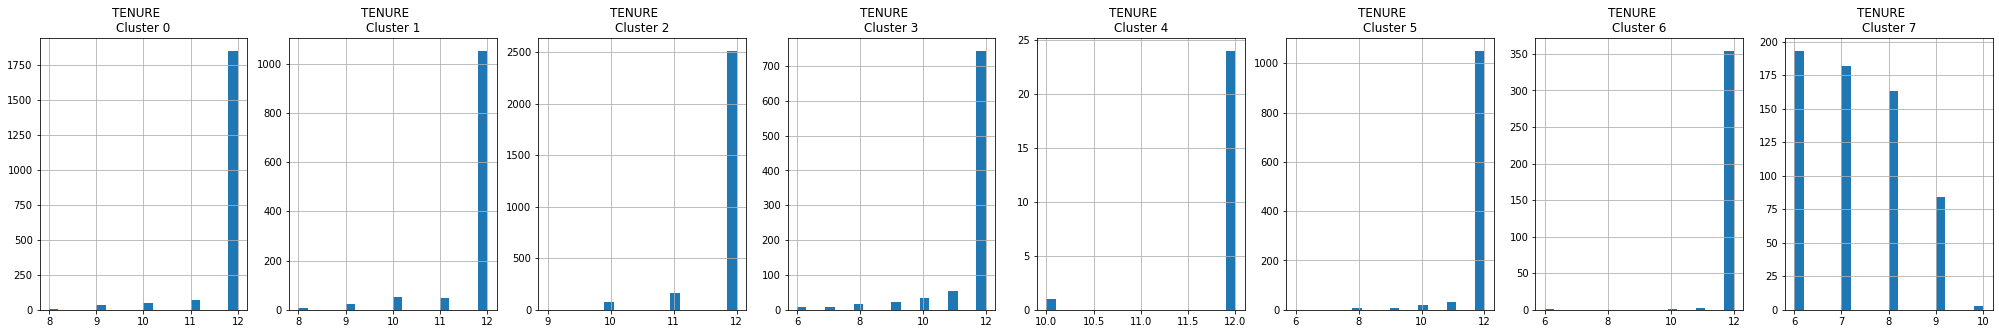

In [ ]:
# Visualizamos histogramas para cada cluster 
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(num_clusters):
        plt.subplot(1, num_clusters, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


# **Aplicar análisis de componentes principales para visualizar la segmentación**

In [ ]:
# Obtenemos las componentes principales en este caso usamos 2 componentes para poder graficarlos 
pca = PCA(n_components = 4)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp


array([[-1.68222007, -1.07645   ,  0.48851111,  0.66553872],
       [-1.13829543,  2.506475  ,  0.60119996, -0.1204019 ],
       [ 0.96968434, -0.38351924,  0.10237984,  1.20924364],
       ...,
       [-0.92620313, -1.81078397, -0.47471086, -2.28027393],
       [-2.33655143, -0.65796526,  0.9747305 , -1.86129491],
       [-0.55642269, -0.40046878,  1.01518369, -1.95320162]])

In [ ]:
pd.DataFrame(
    data    = pca.components_,
    columns = creditcard_df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PC1,0.101078,0.120043,0.411642,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390695,0.211663,0.266249,0.060351,0.132112,0.081020
PC2,0.403957,0.130537,0.041038,0.062872,-0.018533,0.439242,-0.190780,-0.017924,-0.178601,0.434082,0.419734,-0.019394,0.238678,0.257476,0.166970,-0.190026,-0.004326
PC3,-0.160074,-0.420630,0.257903,0.392115,-0.110488,-0.027346,-0.374691,0.115131,-0.473409,-0.109074,-0.115538,-0.077331,0.100483,0.276237,-0.221635,0.124774,-0.064326
PC4,0.283451,0.149742,0.039111,0.078155,-0.051131,-0.254585,-0.188975,0.027464,-0.215001,-0.264220,-0.326931,-0.018109,0.131652,-0.114767,0.402910,-0.424426,0.435286


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.27290037 0.20301991 0.08791979 0.07479975]


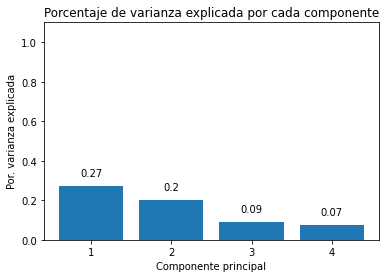

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27290037 0.47592029 0.56384008 0.63863983]


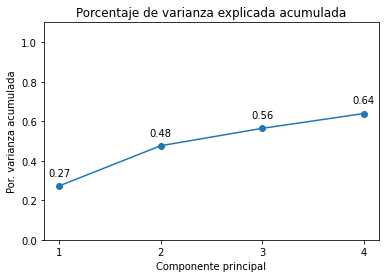

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## **Usamos solo dos componentes para graficar en el plano**

In [ ]:
# Creamos un dataframe con las dos componentes 
# Obtenemos las componentes principales en este caso usamos 2 componentes para poder graficarlos 
modelo_pca = PCA(n_components = 2)
principal_comp = modelo_pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222031, -1.0764466 ],
       [-1.13829289,  2.50649266],
       [ 0.96967803, -0.38356807],
       ...,
       [-0.9262043 , -1.81078474],
       [-2.33654926, -0.65794417],
       [-0.55642092, -0.40046853]])

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = creditcard_df.columns,
    index   = ['PC1', 'PC2']
)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PC1,0.101077,0.120043,0.411641,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390696,0.211663,0.266249,0.060351,0.132112,0.081020
PC2,0.403955,0.130538,0.041037,0.062872,-0.018534,0.439242,-0.190781,-0.017925,-0.178601,0.434082,0.419734,-0.019391,0.238679,0.257476,0.166970,-0.190026,-0.004327



Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

**PC1 =** 0.10 Balance + 0.12 Balance_frequency + **0.4116 Purchases** + **0.346 OneOff_Purchases**+**0.3368 Installments_purchases**-0.0233 Cash_advance+**0.3215 Purchases_frequency** + ....

* Los pesos asignados en la **primera componente** a las variables Purchases, OneOff_Purchases e Installments_purchases son aproximadamente iguales entre ellos y superiores al asignado a Balance y Cash_advance. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a **clientes que compran con la tarjeta de crédito**. 

* En la **segunda componente**, es la variable Balance y todas las relacionadas con Cash_advance las que tienen con diferencia mayor peso que las demás, por lo que correspondería principalmente a **usuarios que solicitan avances y tienen alto endeudamiento** con el banco. 

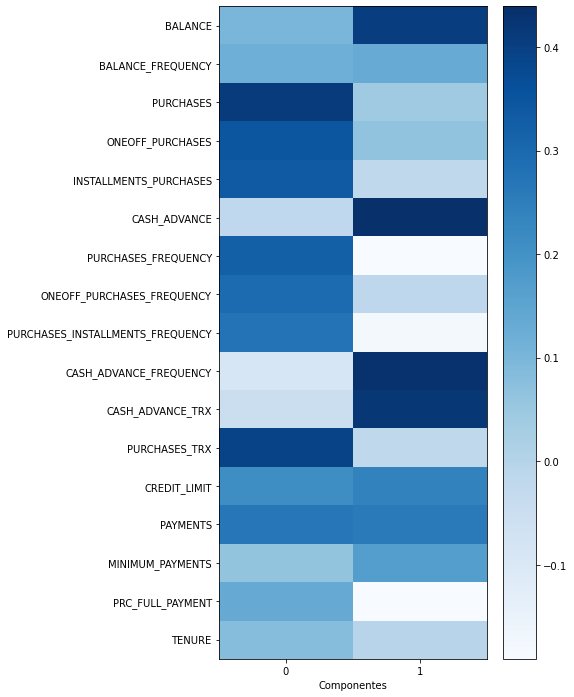

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='Blues', aspect='auto')
plt.yticks(range(len(creditcard_df.columns)), creditcard_df.columns)
plt.xticks(range(modelo_pca.n_components_))
plt.xlabel('Componentes')
plt.grid(False)
plt.colorbar();


In [ ]:
pca_df = pd.DataFrame(data= principal_comp,columns = ['pca1', 'pca2'])

In [ ]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076447,2
1,-1.138293,2.506493,3
2,0.969678,-0.383568,5
3,-0.873628,0.043170,2
4,-1.599434,-0.688579,2


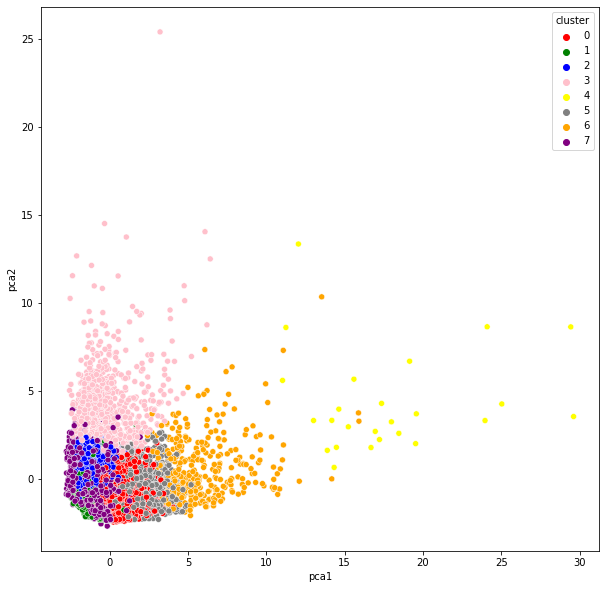

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "orange","purple"]
                     )
plt.show()

# **Aplicar Autoencoders para reducir dimensiones**

* ![Ejemplo](https://docs.google.com/uc?export=download&id=1bJzV0AejxLRcNJuolhNmnwXrExCyIU43)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
#para que las capas sigan una distribución normal truncada
from tensorflow.keras.initializers import glorot_uniform
#Optimizador a utilizar el sgd para que use optimización aleatoria
from keras.optimizers import SGD

#Numero de variables con las que quedaría el dataset después de comprimir:
encoding_dim = 10

#Numero de variables input
input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

#capa inicial 
x = Dense(encoding_dim, activation = 'relu')(input_df)
#capas ocultas 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

#version comprimida
encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

#descomprimir, no se necesita que sea simetrico para que converga 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

#decodifica para que la salida sea igual a la entrada
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#defino el modelo completo
autoencoder = Model(input_df, decoded)
#defino el modelo solo hasta la capa de compresión
encoder = Model(input_df, encoded)

#entreno el modelo completo
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [ ]:
#entrada = salida
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 63ms/step - loss: 0.5897
Epoch 2/25
70/70 [==============================] - 4s 60ms/step - loss: 0.2650
Epoch 3/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1684
Epoch 4/25
70/70 [==============================] - 4s 63ms/step - loss: 0.1281
Epoch 5/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1201
Epoch 6/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0939
Epoch 7/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0969
Epoch 8/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0775
Epoch 9/25
70/70 [==============================] - 4s 60ms/step - loss: 0.0730
Epoch 10/25
70/70 [==============================] - 4s 63ms/step - loss: 0.0704
Epoch 11/25
70/70 [==============================] - 5s 65ms/step - loss: 0.0623
Epoch 12/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0597
Epoch 13/25
70/70 [==================

In [ ]:
#para guardar los resultados de la red y usarlos en otra sesión
autoencoder.save_weights('/content/drive/MyDrive/Toma de decisiones basadas en los datos/Caso practico segmentacion/autoencoder.h5')

OSError: ignored

In [ ]:
#Predecir las 10 caracteristicas de las 17 para cada cliente usando el encoder
pred = encoder.predict(creditcard_df_scaled)

In [ ]:
pred.shape

(8950, 10)

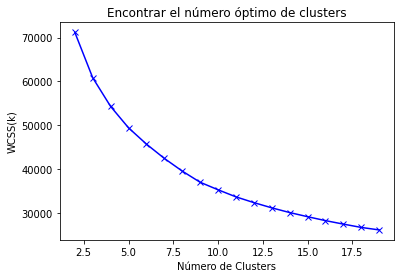

In [ ]:
#Encontrar por técnica del codo el número k de clusters con las variables comprimidas
scores_2 = []

range_values = range(2,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i, n_init= 40, random_state = 123)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [ ]:
kmeans = KMeans(4, n_init= 50, random_state = 123)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(df_cluster_dr)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-4326.383949,921.566877
1,4118.916724,-2432.846380
2,1497.907658,-1997.578677
3,1394.548553,-1488.743434
4,-3743.351867,757.342650


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-4326.383949,921.566877,1
1,4118.916724,-2432.846380,2
2,1497.907658,-1997.578677,1
3,1394.548553,-1488.743434,1
4,-3743.351867,757.342650,1
...,...,...,...
8945,-4208.357971,1122.443282,0
8946,-4123.923994,951.683795,1
8947,-4379.444235,911.504575,0
8948,-4791.117697,1032.540920,2


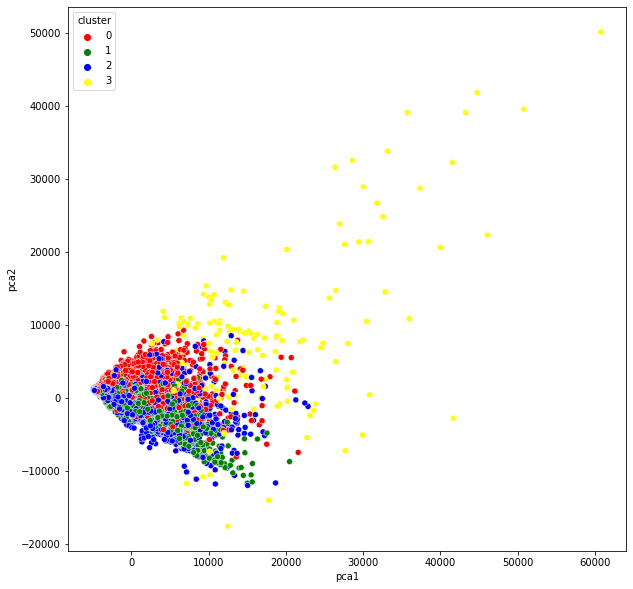

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()